# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
from sklearn.datasets import load_wine
wine=load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
df=wine.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
X=df.drop(['target'], axis=1)
y=df['target']

In [5]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Grid Search
param_grid={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, refit=True)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(grid_search.best_params_)
pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
print("train_score : {} ".format(model.score(X_train, y_train)))
print("test_score : {} ".format(model.score(X_test, y_test)))

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9444444444444444
train_score : 0.9929577464788732 
test_score : 0.9444444444444444 


In [7]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)

Accuracy :  0.9444444444444444


<AxesSubplot: >

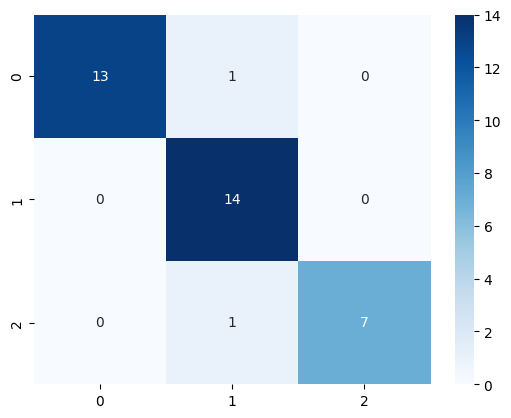

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

<AxesSubplot: >

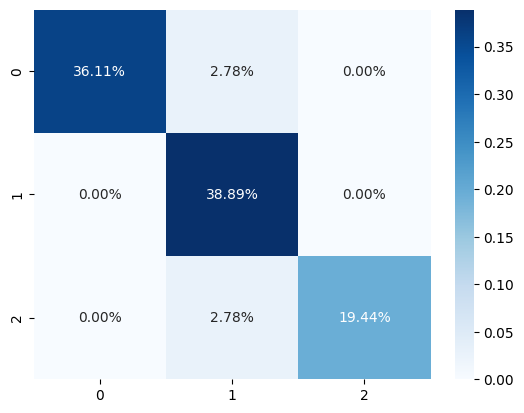

In [9]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')